In [75]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pygad.kerasga as pg
from sklearn.metrics import mean_absolute_error
import pygad
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [118]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [119]:
y_test = y_test.reshape(-1,)

In [111]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [122]:
def plot_sample(X, y, index):
    plt.figure(figsize = (5,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

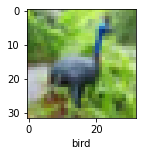

In [123]:
plot_sample(X_train, y_train, 6)

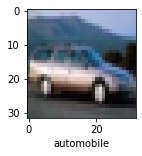

In [126]:
plot_sample(X_train, y_train, 4)

In [127]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

2022-03-16 00:13:25.173122: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-16 00:13:25.217889: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fcace03db60 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-03-16 00:13:25.217908: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


In [13]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.4812 - accuracy: 0.4677
Epoch 2/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.1254 - accuracy: 0.6037
Epoch 3/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9811 - accuracy: 0.6600
Epoch 4/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8972 - accuracy: 0.6903
Epoch 5/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8377 - accuracy: 0.7092
Epoch 6/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7878 - accuracy: 0.7252
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7443 - accuracy: 0.7417
Epoch 8/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7030 - accuracy: 0.7550
Epoch 9/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.6694 - accuracy: 0.7674
Epoch 10/10
1563/1563 [==============================] - 45s 29m

In [15]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.9453 - accuracy: 0.6817


[0.9453362226486206, 0.6816999912261963]

In [16]:
keras_ga = pg.kerasga.KerasGA(model=cnn, num_solutions=10)

In [17]:
def fitness_func(solution, sol_idx):
    #global data_inputs, data_outputs, keras_ga, model
    model_weights_matrix = pg.model_weights_as_matrix(model=cnn,
                                                                 weights_vector=solution)
    cnn.set_weights(weights=model_weights_matrix)
    predictions = cnn.predict(X_test)
    predictions = [np.argmax(element) for element in predictions]
    mae = tf.keras.losses.MeanAbsoluteError()
    error = mae(y_test, predictions).numpy()
    solution_fitness = 1.0 / (error + 0.00000001)
    return solution_fitness

In [18]:
def on_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(ga_instance.last_generation_fitness)[1]), end='\n\n')

In [21]:
ga_instance = pygad.GA(num_generations=10, 
                       num_parents_mating=5, 
                       fitness_func=fitness_func,
                       initial_population=keras_ga.population_weights,
                       on_generation=on_generation,
                       suppress_warnings=True)

In [22]:
ga_instance.run()

Generation = 1
Fitness    = 0.9999999900000002

Generation = 2
Fitness    = 0.9999999900000002

Generation = 3
Fitness    = 0.9999999900000002

Generation = 4
Fitness    = 0.9999999900000002

Generation = 5
Fitness    = 0.9999999900000002

Generation = 6
Fitness    = 0.9999999900000002

Generation = 7
Fitness    = 0.9999999900000002

Generation = 8
Fitness    = 0.9999999900000002

Generation = 9
Fitness    = 0.9999999900000002

Generation = 10
Fitness    = 0.9999999900000002



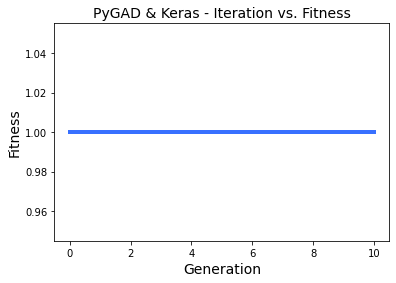

In [23]:
fig = ga_instance.plot_result(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

In [25]:
solution, solution_fitness, _ = ga_instance.best_solution()
print("Parameters of the best solution:\n{solution}".format(solution=solution), end="\n\n")

# This is equation to the number of trainable parameters in the Keras model.
print("Length of the solution is:", len(solution), end='\n\n')

print("Fitness value of the best solution:\n{solution_fitness}".format(solution_fitness=solution_fitness), end='\n\n')

Parameters of the best solution:
[-0.20130342  0.0672918  -0.09399553 ... -0.13370794  0.16102652
 -0.14170289]

Length of the solution is: 167562

Fitness value of the best solution:
0.9999999900000002



In [52]:
im = plt.imread('aero.jpg')
im = np.array(im)
im = im / 255
im.shape

(811, 1200, 3)

In [57]:
best_solution_weights = pg.model_weights_as_matrix(model=cnn,
                                                              weights_vector=solution)
cnn.set_weights(best_solution_weights)
predictions = cnn.predict(X_test)

In [73]:
y_classes = [np.argmax(element) for element in predictions]
y_classes[:20]

[3, 8, 1, 0, 6, 6, 1, 6, 3, 1, 4, 9, 5, 7, 9, 6, 5, 7, 8, 6]

In [74]:
y_test[:20]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6],
      dtype=uint8)

In [79]:
mae = tf.keras.losses.MeanAbsoluteError()
error = mae(y_test, y_classes).numpy()
error

1

In [93]:
accuracy = accuracy_score(y_classes, y_test)
print("Accuracy = ", accuracy*100, "%")

Accuracy =  68.17 %


In [54]:
X_train.shape

(50000, 32, 32, 3)

In [72]:
y_test[:20]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6],
      dtype=uint8)

In [56]:
y_train.shape

(50000,)

In [80]:
mae = mean_absolute_error(y_classes, y_test)
mae

1.1161

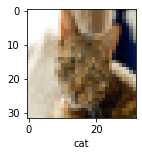

In [91]:
plot_sample(X_test, y_test, 103)

In [92]:
classes[y_classes[103]]

'cat'